# INMERSION DE DATOS

---



El tratamiento del conjunto de datos, hasta llegar al modelado, se desarrolla en cuatro jornadas.

**Objetivos**

Nos proponemos construir un modelo que prediga el precio de las propiedades en la ciudad de Bogota, capital de Colombia.

Para ello, pensamos en que informacion de acceso publico, como las caracteristicas de los inmuebles y el contexto socioeconómico podria ayudarnos a la hora de proponer un modelo predictivo optimo.

Nuestra pregunta:

¿Que variables pueden ayudar a predecir el precio de una propiedad en la ciudad de Bogota?

# AULA 1

TU PRIMER COLAB CON PYTHON Y PANDAS

Importamos las librerias

In [ ]:
import numpy as np
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Conexion a Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargamos el dataset


In [ ]:
inmuebles=pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/inmuebles_bogota.csv')

Consultamos la forma del archivo, el atributo shape me permite tener la forma de mi Data set, tengo 9.520 filas y 8 columnas.



In [ ]:
inmuebles.shape

(9520, 8)

In [ ]:
inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

Tipo: Tipo de propiedad (Casa, Apartamento,Oficina, Local, etc.)

Descripcion: Descripcion del anuncio.

Habitaciones: Cantidad de habitaciones.

Baños: Cantidad de baños.

Área: Superficie total en m².

Barrio: Nombre de barrio donde se ubica la propiedad.

UPZ: unidades de planeación zonal.
Son un conjunto de barrios que pertenecen a una región geográfica que tienen patrones semejantes entre sí y estas unidades de planeamiento son utilizadas por el gobierno para adoptar políticas en beneficio de estas comunidades.

Valor: Precio del aviso en pesos.

In [ ]:
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000


Para renombrar algunas columnas, se crea una variable "columnas" y se le asigna un diccionario, que es una estructura de python.

In [ ]:
columnas={'Baños':'Banos','Área':'Area'}
inmuebles=inmuebles.rename(columns=columnas)
inmuebles.sample(4)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1191,Apartamento,Apartamento en venta en Ciudad Salitre,4,4,155,Ciudad Salitre,Ciudad Salitre Oriental,$ 1.200.000.000
8715,Casa,Casa en venta en Usaquén,2,3,190,Usaquén,Usaquén,$ 795.000.000
9015,Casa,Casa en venta en Usaquén,3,4,337,Usaquén,Usaquén,$ 2.000.000.000
691,Apartamento,Apartamento en venta en El Plan,3,2,106,El Plan,El Rincón,$ 491.000.000


Verificamos que tipo de valor tienen las columnas.

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


Tenemos tres columnas que son del tipo entero y tenemos cinco columnas que son del tipo objeto. Entonces cuando hablamos del tipo objeto estamos haciendo referencia a caracteres alfanuméricos cadenas de caracteres String.

**Desafío**


1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

2. Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

**Punto 1**

Calculo el promedio utilizando groupby

In [ ]:
prom_area=inmuebles.groupby('Barrio').Area.mean()
prom_area

Barrio
Alameda                97.000000
Alhambra              190.411765
Andes Norte           124.857143
Antonio Nariño        163.062500
Barrancas              70.200000
                         ...    
Villa Maria           207.153846
Villas De Granada      86.590909
Villemar               76.888889
Zona Franca            54.000000
Zona Noroccidental    135.785633
Name: Area, Length: 149, dtype: float64

Aplico grafico de barras

<Axes: xlabel='Barrio'>

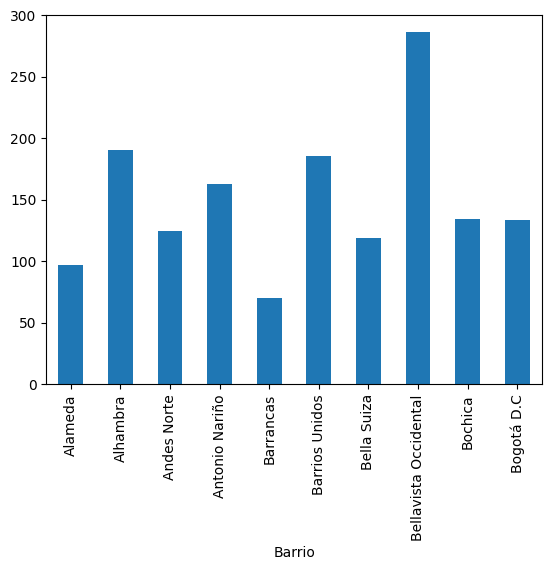

In [ ]:
prom_area.head(10).plot.bar()

**Punto 2**

Otros datos estadisticos

In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area
count,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66
std,2.05,1.26,1731.38
min,1.00,0.00,2.00
25%,2.00,2.00,57.00
50%,3.00,2.00,80.00
75%,3.00,3.00,135.00
max,110.00,9.00,166243.00


**-----------------------------------------------------------------------------**

# AULA 2

TRATAMIENTO DE DATOS Y PRIMEROS GRAFICOS.

# Modificamos la columna Valor

A partir de este atributo, creamos un valor numerico.

La funcion split me permite separar los valores en una fila, a traves de un parametro, en este caso el parentesis esta vacio y es por eso que se divide el valor de peso del campo numerico.

In [ ]:
inmuebles.Valor[0].split()

['$', '360.000.000']

Comenzamos haciendo la conversion de valores de la columna Valor, haciendo los siguientes pasos.

In [ ]:
valor=inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda']=valor[0]
inmuebles['Precio']=valor[1]
inmuebles['Precio']=inmuebles['Precio'].str.replace('.','',regex=True)
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
2893,Apartamento,Apartamento en venta en Engativa,3,1,53,Engativa,Engativá,$ 159.000.000,$,159000000
1932,Apartamento,Apartamento en venta en Zona Noroccidental,3,1,52,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 146.500.000,$,146500000
8526,Apartamento,Apartamento en venta en Chico Norte,2,4,159,Chico Norte,CHAPINERO: Chicó Lago + El Refugio,$ 2.515.535.000,$,2515535000


# Agregamos columna Precio_Millon

Por ultimo se transforman los valores a tipos numericos, y sea crea a partir de Precio, la columna Precio_Millon, reduciendo la cantidad de ceros.

In [ ]:
inmuebles['Precio_Millon']=inmuebles.Precio.astype('float')/1000000

Eliminamos la columna Valor.

In [ ]:
inmuebles=inmuebles.drop('Valor', axis=1)
inmuebles.shape

(9520, 10)

Verificamos.

In [ ]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Moneda         9520 non-null   object 
 8   Precio         9520 non-null   object 
 9   Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 743.9+ KB


**Desafio 2**

1-Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles(refinar el grafico: titulos, aumentar el tamaño de labels, colores, conclusion de la informacion)

2-Precio del m2 por barrio y hacer el grafico mas adecuado para esta nueva variable.

**Punto 1**



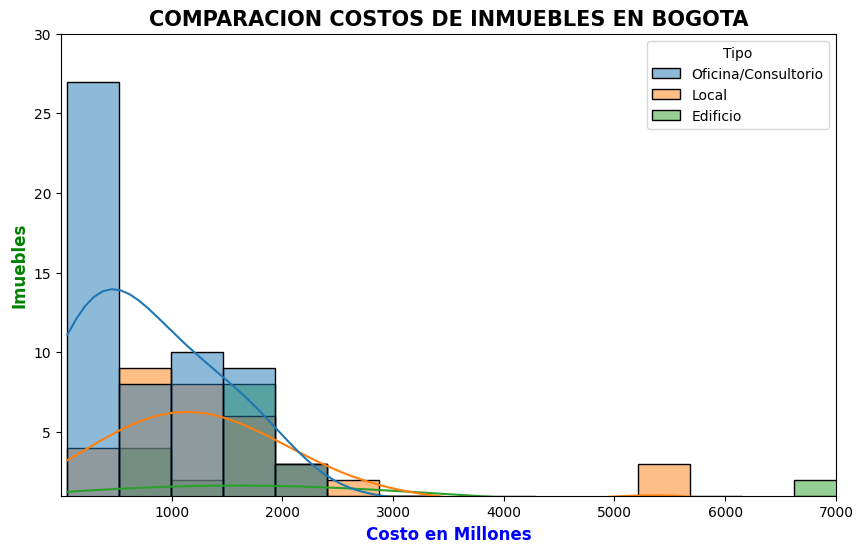

In [ ]:
tipos_inmuebles = inmuebles.loc[(inmuebles['Tipo']== 'Local')|(inmuebles['Tipo']== 'Oficina/Consultorio')|(inmuebles['Tipo']== 'Edificio')]
plt.figure(figsize=(10,6))
grafica = sns.histplot(data=tipos_inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('COMPARACION COSTOS DE INMUEBLES EN BOGOTA',fontdict = {'fontsize': 15,'fontweight': 'bold','color': 'black'})
plt.ylabel('Imuebles', fontsize=12, color = 'green', fontweight='bold')
plt.xlabel('Costo en Millones', fontsize=12, color = 'blue', fontweight='bold')
plt.xlim((1,7000))
plt.ylim(1, 30)

plt.show()

**Conclusion**

El precio para estos 3 tipos de inmueble se encuentra distribuido entre 0 a 3000 millones de pesos colombianos. Por lo que podríamos encontrar una oficina/consultorio, un local o un edificio en este rango de precio sin mucho esfuerzo y por lo cual deberíamos tener en cuenta contar con presupuesto base mínimo que esté en este rango.

**Punto 2**

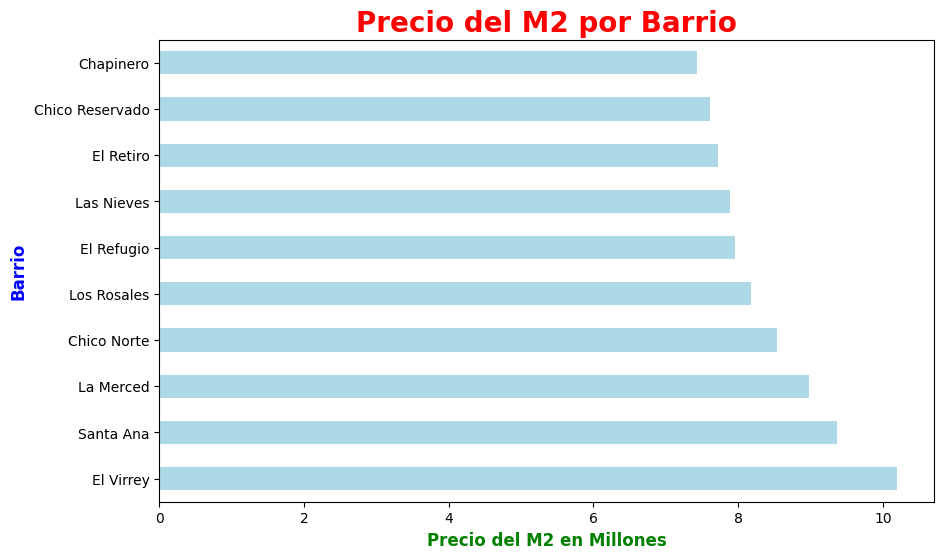

In [ ]:
inmuebles['Precio_m2'] = inmuebles['Precio_Millon']/inmuebles['Area']
precio_m2_por_barrio = inmuebles.groupby('Barrio')['Precio_m2'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
formato_titulo = {'fontsize':14, 'color':'blue'}
formato_etiqueta = {'fontsize':12, 'color':'black'}

grafica = precio_m2_por_barrio.head(10).plot(kind='barh', color='lightblue')
grafica.set_title('Precio del M2 por Barrio',fontdict = {'fontsize': 20,'fontweight': 'bold','color': 'red'})
grafica.set_xlabel('Precio del M2 en Millones', fontsize=12, color = 'green', fontweight='bold')
grafica.set_ylabel('Barrio', fontsize=12, color = 'blue', fontweight='bold')

plt.show()

# AULA 3

# Agregamos la columna Valor_m2_barrio

Calculamos el valor del m2 por barrio, haciendo los siguientes pasos.

In [ ]:
inmuebles['Valor_m2_Millon']=inmuebles['Precio_Millon']/inmuebles['Area']
inmuebles.head(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Moneda,Precio,Precio_Millon,Precio_m2,Valor_m2_Millon
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,360000000,360.00,5.14,5.14
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$,670000000,670.00,3.94,3.94
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$,1120000000,1120.00,7.78,7.78


Analisis de Barrio Alhambra: se suman todos los inmuebles del barrio y tambien su precio, luego se divide por la sumatoria de toda la superficie de cada inmueble y asi obtener el valor especifico del m2 para el barrio y no el promedio calculado anteriormente.

In [ ]:
datos_barrio=inmuebles.groupby('Barrio').sum()
datos_barrio.sample(2)

<ipython-input-20-e6f4d851566c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_barrio=inmuebles.groupby('Barrio').sum()


,Habitaciones,Banos,Area,Precio_Millon,Precio_m2,Valor_m2_Millon
Barrio,,,,,,
Gratamira,6,7,301,1290.00,8.85,8.85
Villa Alsacia,100,68,2432,10067.00,149.77,149.77


Se calcula el valor del m2

In [ ]:
datos_barrio['Valor_m2_Barrio']=datos_barrio['Precio_Millon']/datos_barrio['Area']
datos_barrio

,Habitaciones,Banos,Area,Precio_Millon,Precio_m2,Valor_m2_Millon,Valor_m2_Barrio
Barrio,,,,,,,
Alameda,3,2,97,580.00,5.98,5.98,5.98
Alhambra,51,50,3237,12790.00,73.56,73.56,3.95
Andes Norte,21,20,874,4967.00,42.35,42.35,5.68
Antonio Nariño,207,120,7827,22042.65,169.47,169.47,2.82
Barrancas,43,32,1053,4712.00,66.24,66.24,4.47
...,...,...,...,...,...,...,...
Villa Maria,61,48,2693,5237.00,26.58,26.58,1.94
Villas De Granada,76,51,1905,6210.62,69.71,69.71,3.26
Villemar,53,37,1384,5469.00,71.81,71.81,3.95


Observando los valores que arroja la tabla anterior de 4.33 vs 3.95 de la calculada recientemente, vemos que hay una diferencia de unos miles de pesos si decidimos calcularlo paso a paso.

Agrego Valor_m2_Barrio al DataFrame.

In [ ]:
m2_barrio=dict(datos_barrio['Valor_m2_Barrio'])

In [ ]:
inmuebles['Valor_m2_Barrio']=inmuebles['Barrio']
inmuebles['Valor_m2_Barrio']=inmuebles['Valor_m2_Barrio'].map(m2_barrio)
inmuebles.head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Moneda,Precio,Precio_Millon,Precio_m2,Valor_m2_Millon,Valor_m2_Barrio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,360000000,360.00,5.14,5.14,4.57
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$,670000000,670.00,3.94,3.94,3.40


# **Analisis de datos**

# Tipos de inmuebles

In [ ]:
inmuebles['Tipo'].value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

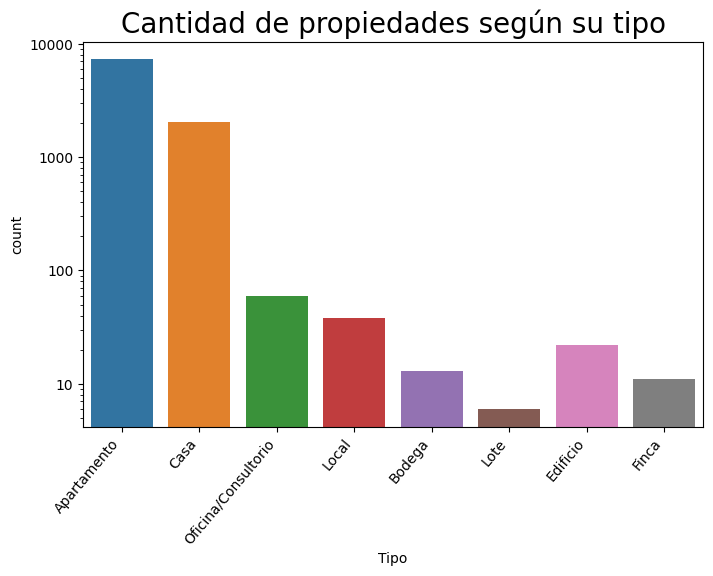

In [ ]:
plt.figure(figsize=(8,5))
plt.yscale('log')
ax = sns.countplot(data = inmuebles, x = "Tipo")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right")
ax.set_title("Cantidad de propiedades según su tipo", fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.show()

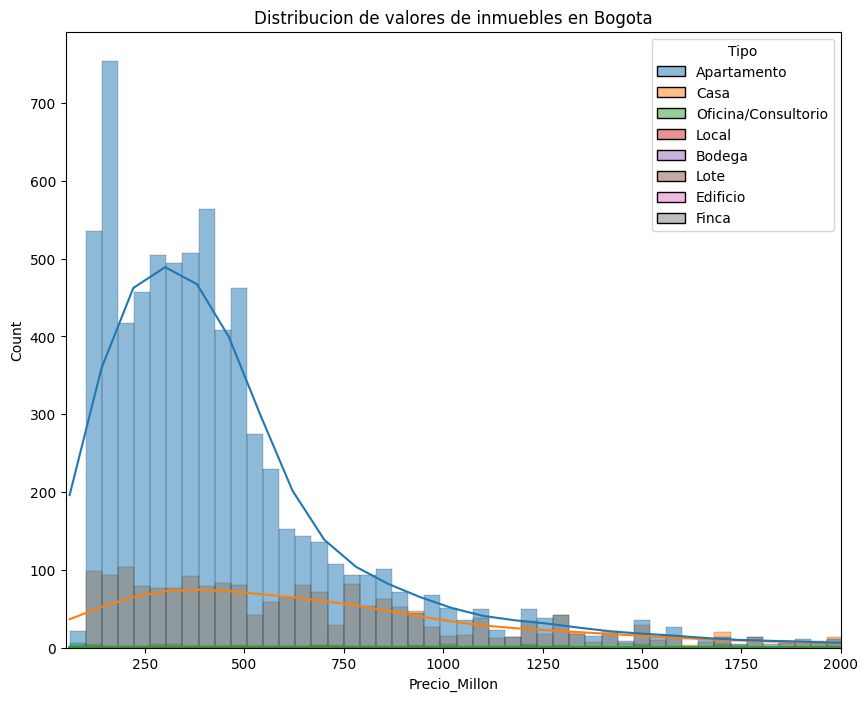

In [ ]:
plt.figure(figsize=(10,8))
grafica=sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribucion de valores de inmuebles en Bogota')
plt.xlim((50,2000))

plt.show()

# Distribucion del dataset por barrio

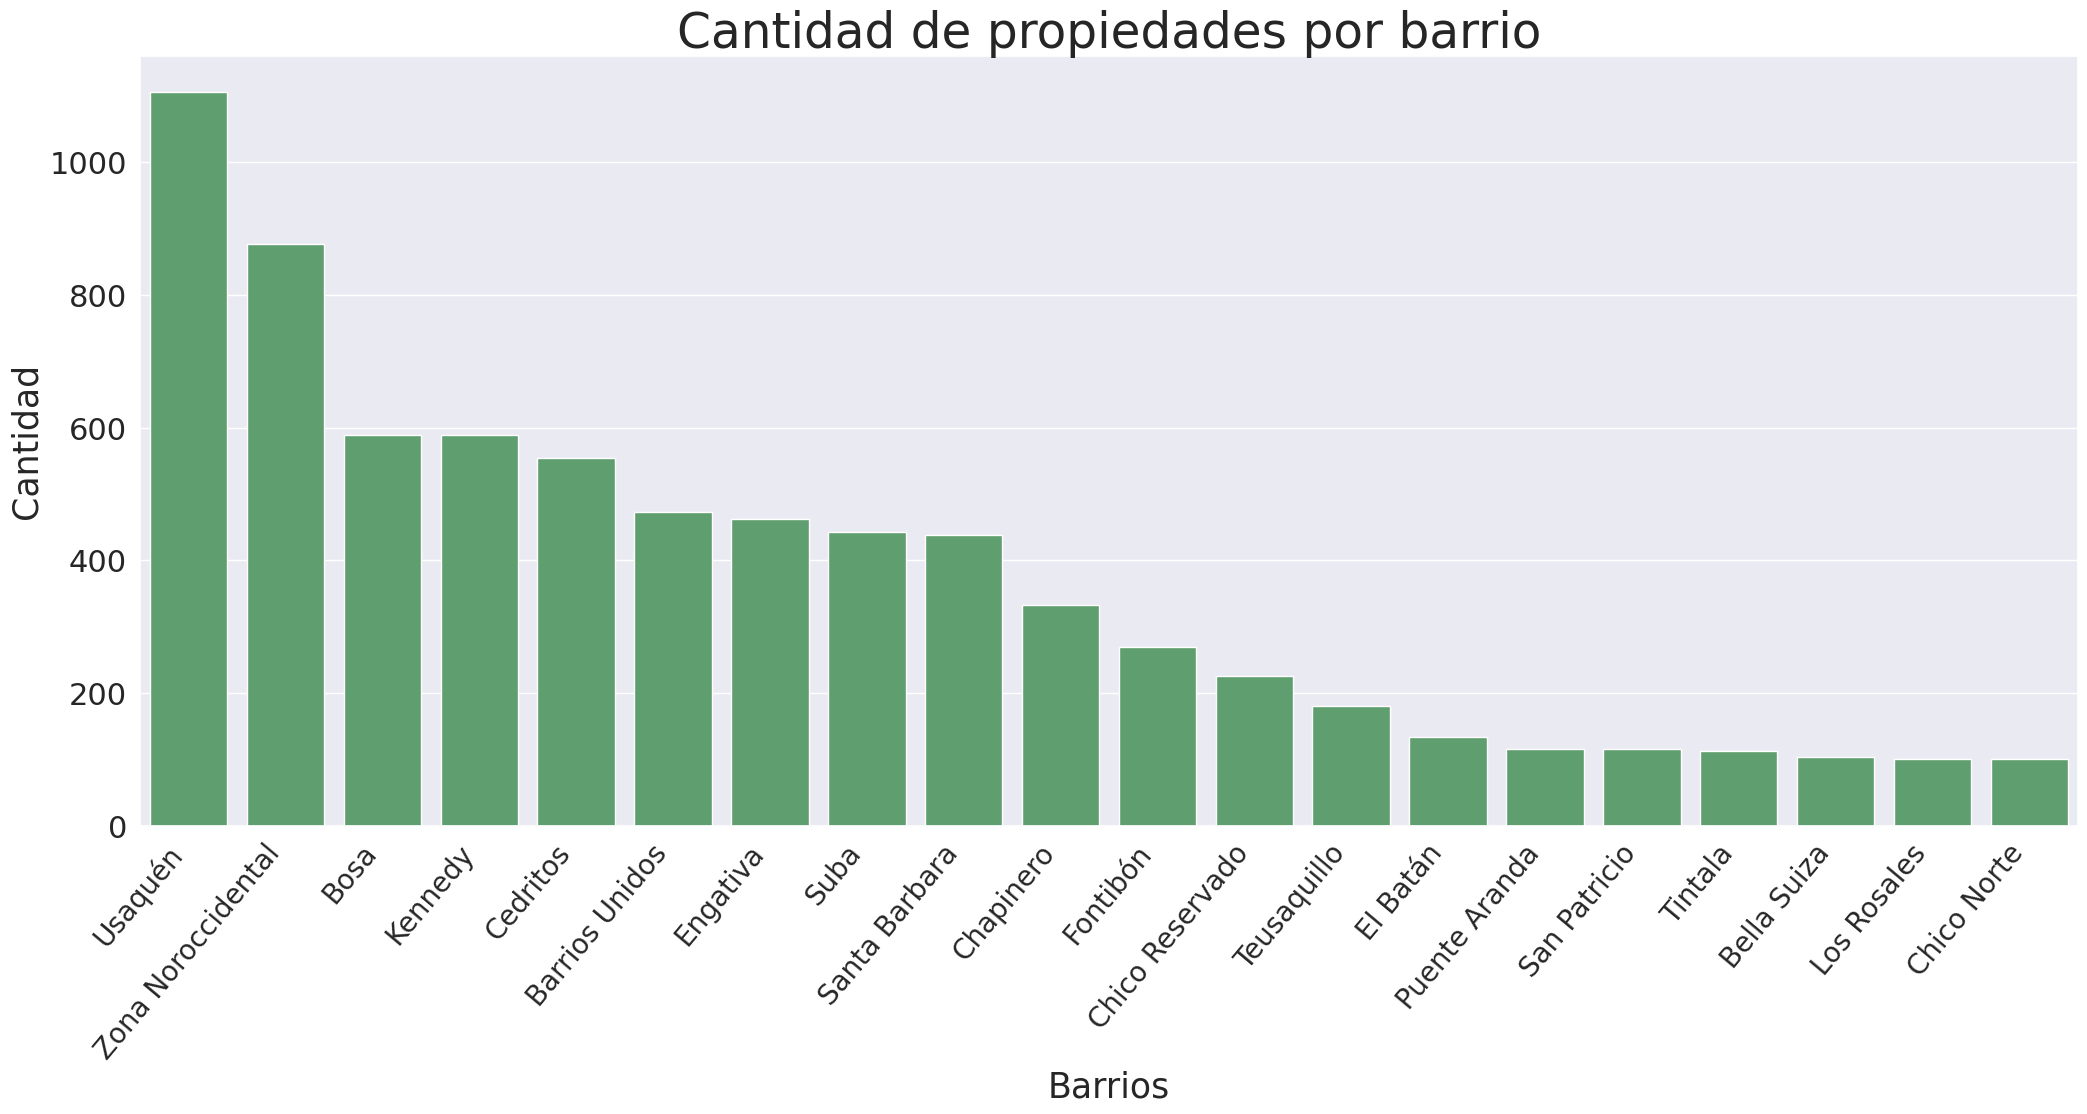

In [ ]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
ax = sns.countplot(data=inmuebles,x="Barrio",order=inmuebles["Barrio"].value_counts().head(20).index, color="g")
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=20)
ax.set_title("Cantidad de propiedades por barrio", fontsize=35)
ax.set_xlabel("Barrios", fontsize=25)
ax.set_ylabel("Cantidad", fontsize=25)
plt.show()

Media de precio por barrio

<ipython-input-28-b65f2e8834f0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_barrio= inmuebles.groupby('Barrio').mean()


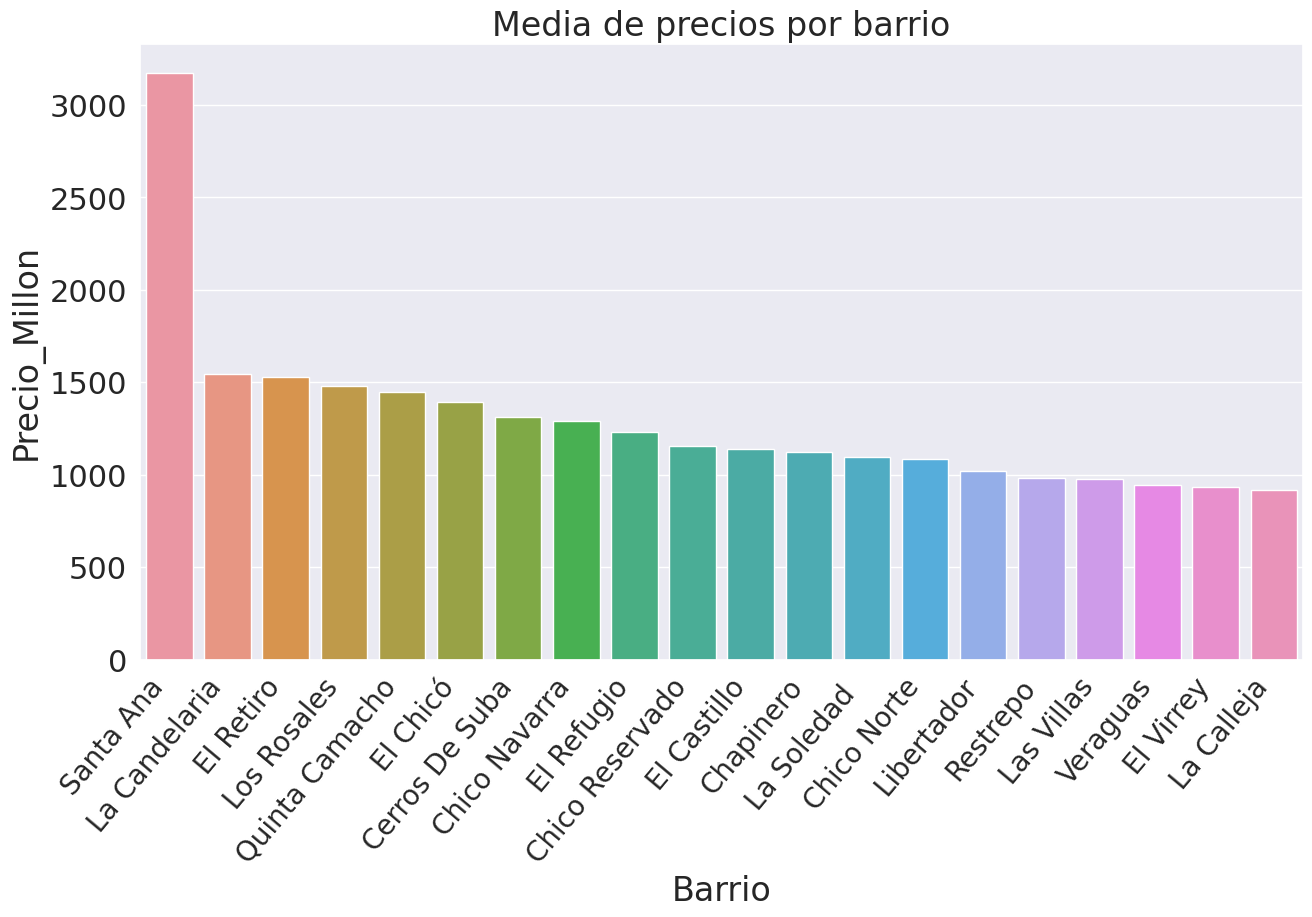

In [ ]:
by_barrio= inmuebles.groupby('Barrio').mean()

plt.figure(figsize=(15,8))
ax = sns.barplot(x = by_barrio.index, y = by_barrio["Precio_Millon"], order=by_barrio.sort_values('Precio_Millon', ascending=False).head(20).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=50,ha="right",fontsize=20)
plt.title("Media de precios por barrio")
plt.show()

# Analizamos la distribucion del precio 

Buscamos si hay outliers

Empleando un grafico de cajas, analizamos la distribucion del precio del dataset

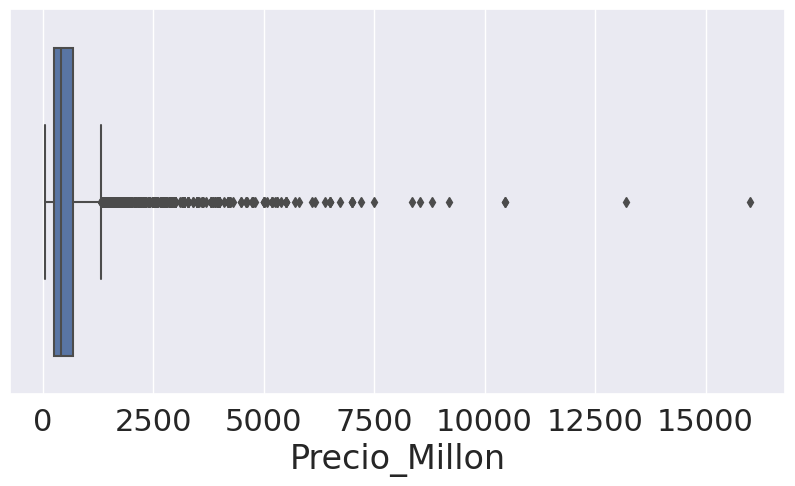

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = inmuebles, x = 'Precio_Millon')
plt.show()

La grafica presenta una distribucion concentrada de valores menores a 1000 millones. Se observan siete valores mas alejados que afectan a la media.

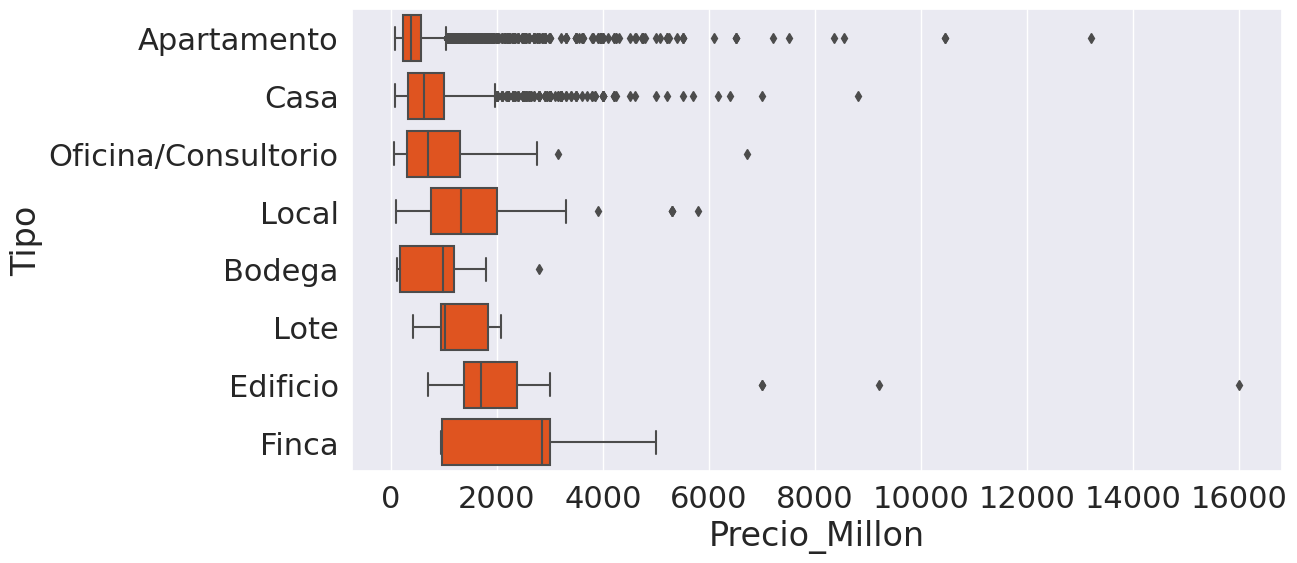

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=inmuebles, x='Precio_Millon', y='Tipo',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

# Eliminacion de valores extremos

# Usando percentiles

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.


In [ ]:
k = 90
percentile_90 = inmuebles['Precio_Millon'].quantile(k / 100)
n_below = len(inmuebles[inmuebles['Precio_Millon'] < percentile_90])
n_above = len(inmuebles[inmuebles['Precio_Millon'] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k,'Precio_Millon', percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(inmuebles)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(inmuebles)))

Percentil 90 de la columna Precio_Millon: 1200.0
% de datos menor que percentil 90: 0.894327731092437
% de datos mayor que percentil 90: 0.09642857142857143


Esto quiere decir que el 90% de los valores de la columna Precio_Millon van a ser menores que 1200 millones y el 10% van a ser mayores a este numero.

In [ ]:
inmuebles['Precio_Millon'].quantile([.95, .98, .99, .995, .998])

0.95   1700.00
0.98   2600.00
0.99   3500.00
0.99   4540.50
1.00   6088.60
Name: Precio_Millon, dtype: float64

Decidimos prescindir del 5% de los registros.

<Axes: xlabel='Precio_Millon'>

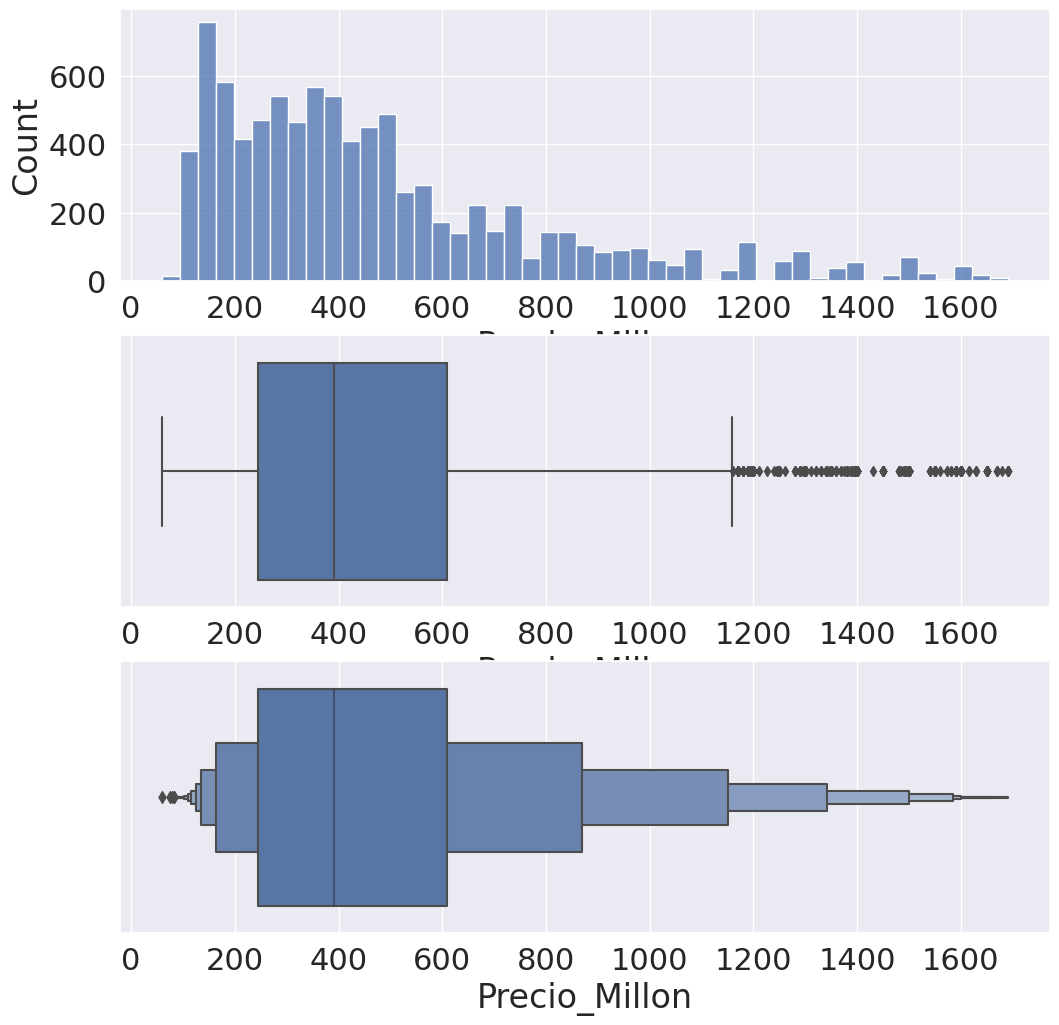

In [ ]:
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = inmuebles['Precio_Millon'].quantile(.95)
data = inmuebles[inmuebles['Precio_Millon'] < max_limit]['Precio_Millon']
sns.histplot(x=data, ax=axes[0])
sns.boxplot(x=data, ax=axes[1])
sns.boxenplot(x=data, ax=axes[2])

Los eliminamos para disminuir la variabilidad

In [ ]:
inmuebles = inmuebles[inmuebles['Precio_Millon'] < max_limit]
inmuebles.shape

(9040, 13)

Eliminamos las columnas Valor_m2_Millon y Precio_m2

In [ ]:
inmuebles=inmuebles.drop(['Valor_m2_Millon','Precio_m2'], axis=1)

Visualizamos la correlacion del dataset original

<ipython-input-36-3fe5cec3354e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = inmuebles.corr()


Text(0.5, 1.0, 'Heatmap de correlación de dataset Inmuebles')

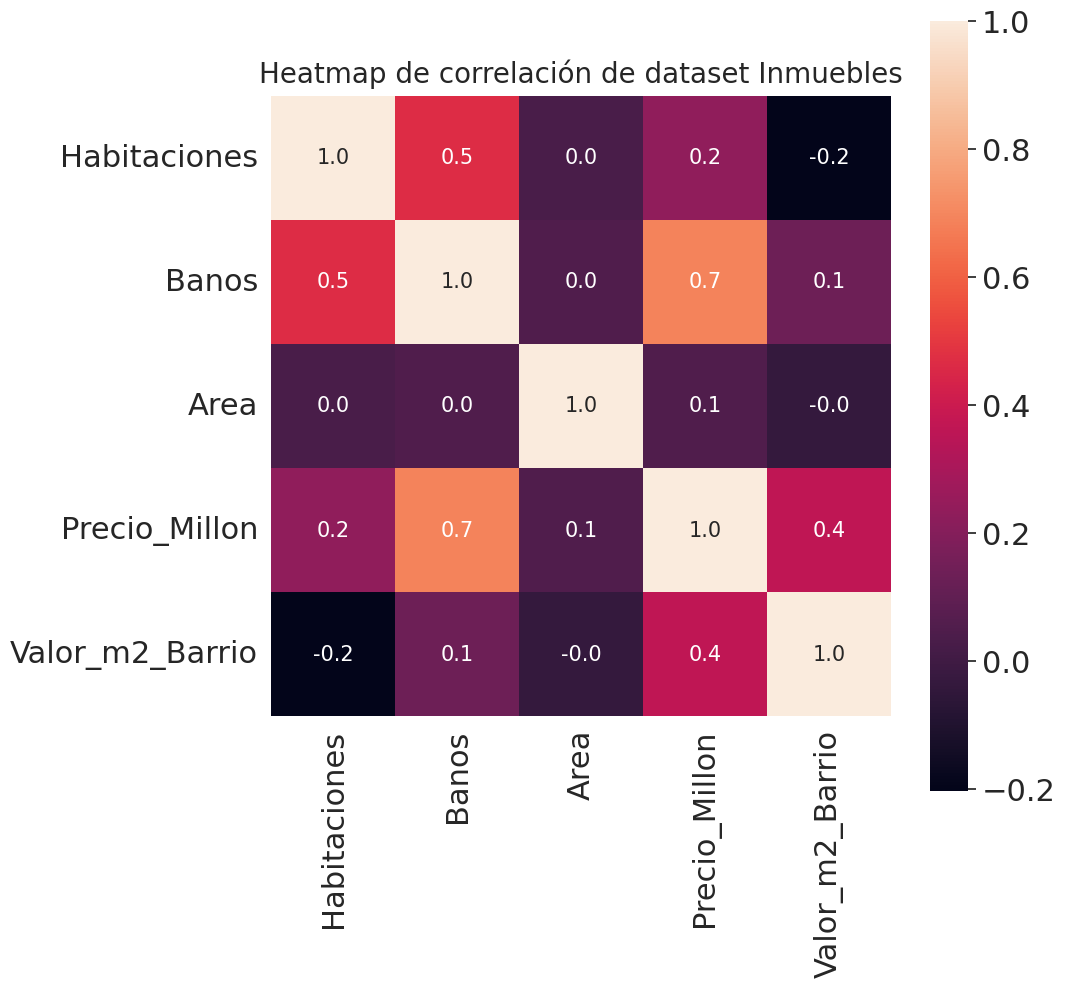

In [ ]:
corr = inmuebles.corr()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
plt.title("Heatmap de correlación de dataset Inmuebles", fontsize=20, pad=10)

..................................

# Agregamos otros datasets

Vamos a traer datos estadísticos de la ciudad de Bogotá, directamente del DANE (Departamento Administrativo Nacional de Estadística) y vamos a ver como estos datos nos ayudarían en inclusión de nuevas variables para el cálculo del precio de los inmuebles en la ciudad de Bogotá.

Encuesta Multiproposito de Bogotá para obtener información socio-económica y de entorno urbano de los habitantes de Bogotá para la formulación, seguimiento y evaluación de las políticas distritales.

https://microdatos.dane.gov.co/index.php/catalog/743

In [ ]:
datos_raw = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Identificación (Capítulo A).csv', sep = ';',encoding='latin-1')
datos_raw.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [ ]:
datos_raw.shape

(106467, 11)

Para descartar el area rural, se crea una nueva variable.

In [ ]:
datos_raw=datos_raw.loc[datos_raw.MPIO==11001]
datos_raw.shape

(86504, 11)

In [ ]:
datos_b = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Datos de la vivenda y su entorno (Capítulo B).csv',sep=';',encoding='latin-1')
datos_c = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
datos_e = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
datos_h = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Educación (Capítulo H).csv',sep=';',encoding='latin-1')
datos_l = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv',sep=';',encoding='latin-1')
datos_k = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Fuerza de trabajo (Capítulo K).csv',sep=';',encoding='latin-1')

<ipython-input-40-95f8ee94dac2>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Condiciones habitacionales del hogar (Capítulo C).csv',sep=';',encoding='latin-1')
<ipython-input-40-95f8ee94dac2>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Composición del hogar y demografía (Capítulo E).csv',sep=';',encoding='latin-1')
<ipython-input-40-95f8ee94dac2>:4: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/Educación (Capítulo H).csv',sep=';',encoding='latin-1')
<ipython-input-40-95f8ee94dac2>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low_memory=Fal

Usando la funcion merge, unimos losnuevos conjuntos de datos

In [ ]:
datos_dane = pd.merge(datos_raw,datos_b,on='DIRECTORIO', how='left')
datos_dane.shape

(86504, 73)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_c,on='DIRECTORIO', how='left')
datos_dane.shape

(87061, 214)

In [ ]:
datos_dane = pd.merge(datos_dane,datos_e,on='DIRECTORIO', how='left')

<ipython-input-43-94d5bdd5b9a5>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane,datos_e,on='DIRECTORIO', how='left')


In [ ]:
datos_dane.shape

(238559, 281)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238559 entries, 0 to 238558
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 513.3+ MB


**Desafío 3**

1-Dar un vistazo a la base de datos del DANE, entender estas variables conceptualmente para entender mejor el contexto de esta base.

2-Organizar tu notebook para que tu proyecto quede mejor presentado.

---------------------------------------------------

# AULA 4


**Cruzando bases y machine learning.**

# Volvemos a importar el conjunto de datos previamente tratado

Luego de limpiar el dataset subido anteriormente, eliminamos la informacion irrelevante y seleccionamos 55 variables que podrian influir en los resultados

In [ ]:
datos_dane=pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/datos_dane.csv')
datos_dane.head()

,DIRECTORIO,NOMBRE_LOCALIDAD,NOMBRE_ESTRATO,NVCBP4,NVCBP14A,NVCBP14D,NVCBP14E,NVCBP14G,NVCBP15A,NVCBP15C,...,NHCLP5,NHCLP8AB,NHCLP8AE,NHCLP10,NHCLP11,NHCLP29_1A,NHCLP29_1C,NHCLP29_1E,NHCLP29_1F,NPCHP4
0,3004368.00,Usaquén,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,2,2,2,2,2,2,...,1,NaN,NaN,2,2,NaN,NaN,NaN,NaN,9.00
1,3004369.00,Usaquén,Usaquén,1,2,2,2,2,2,2,...,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,11.00
2,3004375.00,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,2,2,2,2,2,2,1,...,2,NaN,NaN,2,2,NaN,NaN,1.00,NaN,11.00
3,3004380.00,Usaquén,Los Cedros,1,2,2,2,2,2,2,...,1,NaN,NaN,3,2,NaN,NaN,NaN,NaN,9.00
4,3004383.00,Fontibón,Ciudad Salitre Occidental,1,2,2,2,2,1,2,...,2,NaN,NaN,2,2,NaN,NaN,NaN,NaN,11.00


In [ ]:
datos_dane.shape

(9857, 55)

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DIRECTORIO        9857 non-null   float64
 1   NOMBRE_LOCALIDAD  9857 non-null   object 
 2   NOMBRE_ESTRATO    9857 non-null   object 
 3   NVCBP4            9857 non-null   int64  
 4   NVCBP14A          9857 non-null   int64  
 5   NVCBP14D          9857 non-null   int64  
 6   NVCBP14E          9857 non-null   int64  
 7   NVCBP14G          9857 non-null   int64  
 8   NVCBP15A          9857 non-null   int64  
 9   NVCBP15C          9857 non-null   int64  
 10  NVCBP15F          9857 non-null   int64  
 11  NVCBP15G          9857 non-null   int64  
 12  NVCBP16A3         9857 non-null   int64  
 13  NVCBP16A4         9857 non-null   int64  
 14  NPCKP17           9857 non-null   float64
 15  NPCKP18           9857 non-null   float64
 16  NPCKP23           9558 non-null   float64


Renombramos las columnas para que hacerlas legibles

In [ ]:
dic_dane = {
       'NVCBP4':'CONJUNTO_CERRADO',
       'NVCBP14A':'FABRICAS_CERCA', 'NVCBP14D':'TERMINALES_BUS', 'NVCBP14E':'BARES_DISCO', 
       'NVCBP14G':'OSCURO_PELIGROSO', 'NVCBP15A':'RUIDO', 'NVCBP15C':'INSEGURIDAD',
       'NVCBP15F':'BASURA_INADECUADA', 'NVCBP15G':'INVASION','NVCBP16A3':'MOV_ADULTOS_MAYORES', 
       'NVCBP16A4':'MOV_NINOS_BEBES',
       'NPCKP17':'OCUPACION','NPCKP18':'CONTRATO','NPCKP23':'SALARIO_MES', 
       'NPCKP44A':'DONDE_TRABAJA', 'NPCKPN62A':'DECLARACION_RENTA', 
       'NPCKPN62B':'VALOR_DECLARACION', 'NPCKP64A':'PERDIDA_TRABAJO_C19', 
       'NPCKP64E':'PERDIDA_INGRESOS_C19',
       'NHCCP3':'TIENE_ESCRITURA', 'NHCCP6':'ANO_COMPRA', 'NHCCP7':'VALOR_COMPRA', 'NHCCP8_1':'HIPOTECA_CRED_BANCO',
       'NHCCP8_2':'OTRO_CRED_BANCO', 'NHCCP8_3':'CRED_FNA', 'NHCCP8_6':'PRESTAMOS_AMIGOS',
       'NHCCP8_7':'CESANTIAS', 'NHCCP8_8':'AHORROS', 'NHCCP8_9':'SUBSIDIOS',
       'NHCCP9':'CUANTO_PAGARIA_MENSUAL', 'NHCCP11':'PLANES_ADQUIRIR_VIVIENDA', 
       'NHCCP11A':'MOTIVO_COMPRA', 'NHCCP12':'RAZON_NO_ADQ_VIV', 'NHCCP41':'TIENE_CARRO','NHCCP41A':'CUANTOS_CARROS',
       'NHCCP47A':'TIENE_PERROS', 'NHCCP47B':'TIENE_GATOS', 'NHCLP2A':'VICTIMA_ATRACO', 'NHCLP2B':'VICTIMA_HOMICIDIO', 
       'NHCLP2C':'VICTIMA_PERSECUSION',
       'NHCLP2E':'VICTIMA_ACOSO', 'NHCLP4':'COMO_VIVE_ECON', 'NHCLP5':'COMO_NIVEL_VIDA', 
       'NHCLP8AB':'REACCION_OPORTUNA_POLICIA', 'NHCLP8AE':'COMO_TRANSPORTE_URBANO', 'NHCLP10':'SON_INGRESOS_SUFICIENTES',
       'NHCLP11':'SE_CONSIDERA_POBRE', 'NHCLP29_1A':'MED_C19_TRABAJO', 
       'NHCLP29_1C':'MED_C19_CAMBIO_VIVIENDA', 'NHCLP29_1E':'MED_C19_ENDEUDAMIENTO', 
       'NHCLP29_1F':'MED_C19_VENTA_BIENES','NPCHP4':'NIVEL_EDUCATIVO'
       }

datos_dane = datos_dane.rename(columns=dic_dane)
datos_dane.columns

Index(['DIRECTORIO', 'NOMBRE_LOCALIDAD', 'NOMBRE_ESTRATO', 'CONJUNTO_CERRADO',
       'FABRICAS_CERCA', 'TERMINALES_BUS', 'BARES_DISCO', 'OSCURO_PELIGROSO',
       'RUIDO', 'INSEGURIDAD', 'BASURA_INADECUADA', 'INVASION',
       'MOV_ADULTOS_MAYORES', 'MOV_NINOS_BEBES', 'OCUPACION', 'CONTRATO',
       'SALARIO_MES', 'DONDE_TRABAJA', 'DECLARACION_RENTA',
       'VALOR_DECLARACION', 'PERDIDA_TRABAJO_C19', 'PERDIDA_INGRESOS_C19',
       'TIENE_ESCRITURA', 'ANO_COMPRA', 'VALOR_COMPRA', 'HIPOTECA_CRED_BANCO',
       'OTRO_CRED_BANCO', 'CRED_FNA', 'PRESTAMOS_AMIGOS', 'CESANTIAS',
       'AHORROS', 'SUBSIDIOS', 'CUANTO_PAGARIA_MENSUAL',
       'PLANES_ADQUIRIR_VIVIENDA', 'MOTIVO_COMPRA', 'RAZON_NO_ADQ_VIV',
       'TIENE_CARRO', 'CUANTOS_CARROS', 'TIENE_PERROS', 'TIENE_GATOS',
       'VICTIMA_ATRACO', 'VICTIMA_HOMICIDIO', 'VICTIMA_PERSECUSION',
       'VICTIMA_ACOSO', 'COMO_VIVE_ECON', 'COMO_NIVEL_VIDA',
       'REACCION_OPORTUNA_POLICIA', 'COMO_TRANSPORTE_URBANO',
       'SON_INGRESOS_SUFICIE

In [ ]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9857 entries, 0 to 9856
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DIRECTORIO                 9857 non-null   float64
 1   NOMBRE_LOCALIDAD           9857 non-null   object 
 2   NOMBRE_ESTRATO             9857 non-null   object 
 3   CONJUNTO_CERRADO           9857 non-null   int64  
 4   FABRICAS_CERCA             9857 non-null   int64  
 5   TERMINALES_BUS             9857 non-null   int64  
 6   BARES_DISCO                9857 non-null   int64  
 7   OSCURO_PELIGROSO           9857 non-null   int64  
 8   RUIDO                      9857 non-null   int64  
 9   INSEGURIDAD                9857 non-null   int64  
 10  BASURA_INADECUADA          9857 non-null   int64  
 11  INVASION                   9857 non-null   int64  
 12  MOV_ADULTOS_MAYORES        9857 non-null   int64  
 13  MOV_NINOS_BEBES            9857 non-null   int64

Se calcula el promedio de las variables.

nota:

NOMBRE_ESTRATO=UPZ

In [ ]:
datos_dane.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean().head()

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,1.89,1.19,1.85,1.89,1.56,1.84,1493859.61,1.16,1.92,1.68,1.80
Américas,1.38,1.25,1.98,1.79,1.61,1.92,2672138.14,1.06,1.97,1.72,1.85
Apogeo,1.65,1.30,1.75,1.94,1.68,2.00,1837583.18,1.08,1.92,1.65,1.92
Arborizadora,1.43,1.30,1.95,1.88,1.69,1.84,1802296.76,1.03,1.88,1.61,1.82
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,1.37,1.33,1.99,1.98,1.70,1.87,2943730.73,1.05,1.95,1.70,1.94


In [ ]:
datos=datos_dane[['NOMBRE_ESTRATO','CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].replace(2,0)
datos

,NOMBRE_ESTRATO,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,USAQUÉN: Paseo de Los Libertadores + La Uribe,1,0,0,0,0,0,99.00,1.00,0,0,0
1,Usaquén,1,0,0,0,0,0,10000000.00,1.00,0,0,0
2,CHAPINERO: Pardo Rubio + Chapinero,0,1,0,0,0,0,4000000.00,1.00,0,1,0
3,Los Cedros,1,0,0,0,0,0,5000000.00,1.00,0,1,0
4,Ciudad Salitre Occidental,1,0,0,0,1,0,3500000.00,1.00,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9852,SANTA FE: Las Nieves + Sagrado Corazón,1,1,0,0,1,0,6000000.00,1.00,0,0,0
9853,SANTA FE: Las Nieves + Sagrado Corazón,0,1,0,1,1,0,1800000.00,1.00,0,0,0
9854,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,7200000.00,1.00,0,0,0
9855,SANTA FE: Las Nieves + Sagrado Corazón,1,0,0,0,0,0,99.00,1.00,0,1,0


In [ ]:
datos.NOMBRE_ESTRATO.value_counts()

Niza                                                   243
SUBA: La Academia + Guaymaral + San José de Bavaria    212
CHAPINERO: Chicó Lago + El Refugio                     210
Los Libertadores                                       208
Modelia                                                205
                                                      ... 
Tunjuelito                                              26
Lourdes                                                 25
Localidad Chapinero resto                               21
Localidad Usaquén resto                                 10
Localidad Santa Fe resto                                 8
Name: NOMBRE_ESTRATO, Length: 102, dtype: int64

In [ ]:
datos_tratados=datos.groupby('NOMBRE_ESTRATO')[['CONJUNTO_CERRADO','INSEGURIDAD','TERMINALES_BUS','BARES_DISCO','RUIDO','OSCURO_PELIGROSO','SALARIO_MES','TIENE_ESCRITURA','PERDIDA_TRABAJO_C19','PERDIDA_INGRESOS_C19','PLANES_ADQUIRIR_VIVIENDA']].mean()
datos_tratados

,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
NOMBRE_ESTRATO,,,,,,,,,,,
20 de Julio,0.11,0.81,0.15,0.11,0.44,0.16,1493859.61,0.84,0.08,0.32,0.20
Américas,0.62,0.75,0.02,0.21,0.39,0.08,2672138.14,0.94,0.03,0.28,0.15
Apogeo,0.35,0.70,0.25,0.06,0.32,0.00,1837583.18,0.92,0.08,0.35,0.08
Arborizadora,0.57,0.70,0.05,0.12,0.31,0.16,1802296.76,0.97,0.12,0.39,0.18
BARRIOS UNIDOS: Parque Salitre + Doce de Octubre,0.63,0.67,0.01,0.02,0.30,0.13,2943730.73,0.95,0.05,0.30,0.06
...,...,...,...,...,...,...,...,...,...,...,...
Usaquén,0.90,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
Venecia,0.47,0.82,0.24,0.29,0.50,0.36,2078712.71,0.83,0.14,0.40,0.25
Verbenal,0.77,0.56,0.08,0.03,0.25,0.14,2445403.14,0.87,0.03,0.27,0.09


In [ ]:
pd.merge(inmuebles,datos_tratados,left_on='UPZ', right_on='NOMBRE_ESTRATO',how='left')

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Moneda,Precio,Precio_Millon,...,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,360000000,360.00,...,0.52,0.01,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$,670000000,670.00,...,0.58,0.12,0.11,0.34,0.13,2794784.29,0.94,0.09,0.30,0.18
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$,1120000000,1120.00,...,0.22,0.00,0.05,0.19,0.02,5512355.76,0.88,0.03,0.19,0.07
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$,890000000,890.00,...,0.22,0.01,0.03,0.20,0.01,4670896.88,0.97,0.02,0.17,0.12
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$,970000000,970.00,...,0.42,0.00,0.02,0.27,0.01,4832842.64,0.96,0.02,0.16,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,Apartamento,Apartamento en venta en Kennedy,3,2,70,Kennedy,Kennedy Central,$,290000000,290.00,...,0.61,0.03,0.17,0.43,0.09,2144185.60,0.91,0.07,0.26,0.19
9036,Apartamento,Apartamento en venta en Parque Central Bavaria,2,2,100,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$,670000000,670.00,...,0.49,0.02,0.15,0.42,0.09,4177178.77,0.93,0.02,0.12,0.07
9037,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$,900000000,900.00,...,0.71,0.03,0.17,0.47,0.26,2356994.56,0.90,0.05,0.22,0.21
9038,Casa,Casa en venta en Engativa,3,2,183,Engativa,Engativá,$,335000000,335.00,...,0.87,0.02,0.11,0.54,0.13,1418652.63,0.85,0.02,0.39,0.07


In [ ]:
datos_ml = pd.merge(inmuebles,datos_tratados, left_on='UPZ', right_on='NOMBRE_ESTRATO', how='left')
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9040 entries, 0 to 9039
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      9040 non-null   object 
 1   Descripcion               9040 non-null   object 
 2   Habitaciones              9040 non-null   int64  
 3   Banos                     9040 non-null   int64  
 4   Area                      9040 non-null   int64  
 5   Barrio                    9040 non-null   object 
 6   UPZ                       8998 non-null   object 
 7   Moneda                    9040 non-null   object 
 8   Precio                    9040 non-null   object 
 9   Precio_Millon             9040 non-null   float64
 10  Valor_m2_Barrio           9040 non-null   float64
 11  CONJUNTO_CERRADO          8887 non-null   float64
 12  INSEGURIDAD               8887 non-null   float64
 13  TERMINALES_BUS            8887 non-null   float64
 14  BARES_DI

# Importamos los codigos numericos pertenecientes a UPZ

In [ ]:
upz = pd.read_csv('/content/drive/MyDrive/INMERSION_DE_DATOS/cod_upz.csv')
datos_ml = pd.merge(datos_ml,upz,left_on='UPZ',right_on='NOMBRE_ESTRATO', how='inner')
datos_ml.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Moneda,Precio,Precio_Millon,...,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,NOMBRE_ESTRATO,COD_UPZ_GRUPO
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,360000000,360.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
1,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$,300000000,300.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
2,Apartamento,Apartamento en venta en Zona Noroccidental,2,1,45,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,239000000,239.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
3,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,1600000000,1600.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00
4,Casa,Casa en venta en Zona Noroccidental,5,5,450,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$,1450000000,1450.00,...,0.23,0.35,0.13,4034787.96,0.90,0.04,0.28,0.09,CHAPINERO: Pardo Rubio + Chapinero,816.00


In [ ]:
datos_ml.shape

(8839, 24)

In [ ]:
datos_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8839 entries, 0 to 8838
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tipo                      8839 non-null   object 
 1   Descripcion               8839 non-null   object 
 2   Habitaciones              8839 non-null   int64  
 3   Banos                     8839 non-null   int64  
 4   Area                      8839 non-null   int64  
 5   Barrio                    8839 non-null   object 
 6   UPZ                       8839 non-null   object 
 7   Moneda                    8839 non-null   object 
 8   Precio                    8839 non-null   object 
 9   Precio_Millon             8839 non-null   float64
 10  Valor_m2_Barrio           8839 non-null   float64
 11  CONJUNTO_CERRADO          8839 non-null   float64
 12  INSEGURIDAD               8839 non-null   float64
 13  TERMINALES_BUS            8839 non-null   float64
 14  BARES_DI

# Agregamos la variable Salario_anual_mi

In [ ]:
datos_ml['SALARIO_ANUAL_MI'] = datos_ml['SALARIO_MES']*12/1000000
datos_ml['SALARIO_ANUAL_MI']

0      48.42
1      48.42
2      48.42
3      48.42
4      48.42
        ... 
8834   29.34
8835   29.34
8836   29.34
8837   29.34
8838   29.34
Name: SALARIO_ANUAL_MI, Length: 8839, dtype: float64

Analizamos como se comporta con respecto a la variable valor del m2 por barrio, con un grafico de dispersion 

En general, se nota un incremento de Valor_m2_Barrio a mayor salario

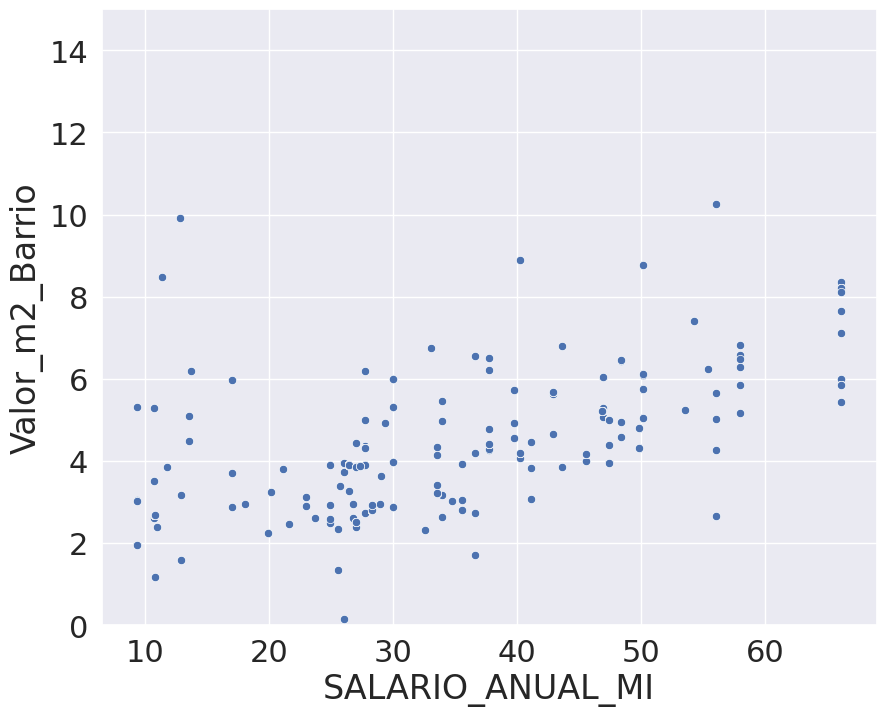

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=datos_ml, x='SALARIO_ANUAL_MI',y ='Valor_m2_Barrio')
plt.ylim((0,15))
plt.show()

# Correlacion de las variables

In [ ]:
datos_ml.corr()

<ipython-input-62-06e284398928>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_ml.corr()


,Habitaciones,Banos,Area,Precio_Millon,Valor_m2_Barrio,CONJUNTO_CERRADO,INSEGURIDAD,TERMINALES_BUS,BARES_DISCO,RUIDO,OSCURO_PELIGROSO,SALARIO_MES,TIENE_ESCRITURA,PERDIDA_TRABAJO_C19,PERDIDA_INGRESOS_C19,PLANES_ADQUIRIR_VIVIENDA,COD_UPZ_GRUPO,SALARIO_ANUAL_MI
Habitaciones,1.00,0.47,0.03,0.23,-0.20,-0.12,0.13,0.07,0.11,0.14,0.11,-0.17,-0.07,0.06,0.12,0.09,-0.11,-0.17
Banos,0.47,1.00,0.05,0.69,0.14,0.16,-0.19,-0.16,-0.10,-0.17,-0.20,0.19,0.12,-0.09,-0.15,-0.09,0.04,0.19
Area,0.03,0.05,1.00,0.05,-0.03,-0.01,-0.00,-0.01,-0.01,-0.00,0.01,-0.01,-0.01,0.02,0.01,0.01,-0.00,-0.01
Precio_Millon,0.23,0.69,0.05,1.00,0.37,0.27,-0.32,-0.24,-0.17,-0.31,-0.32,0.38,0.18,-0.15,-0.28,-0.18,0.19,0.38
Valor_m2_Barrio,-0.20,0.14,-0.03,0.37,1.00,0.65,-0.66,-0.37,-0.41,-0.66,-0.59,0.82,0.39,-0.31,-0.64,-0.24,0.41,0.82
CONJUNTO_CERRADO,-0.12,0.16,-0.01,0.27,0.65,1.00,-0.84,-0.30,-0.51,-0.70,-0.66,0.80,0.60,-0.34,-0.78,0.05,0.09,0.80
INSEGURIDAD,0.13,-0.19,-0.00,-0.32,-0.66,-0.84,1.00,0.51,0.60,0.85,0.75,-0.81,-0.55,0.29,0.74,0.09,-0.00,-0.81
TERMINALES_BUS,0.07,-0.16,-0.01,-0.24,-0.37,-0.30,0.51,1.00,0.39,0.67,0.58,-0.52,-0.30,0.17,0.36,0.25,-0.10,-0.52
BARES_DISCO,0.11,-0.10,-0.01,-0.17,-0.41,-0.51,0.60,0.39,1.00,0.60,0.50,-0.38,-0.25,-0.02,0.33,-0.06,0.26,-0.38
RUIDO,0.14,-0.17,-0.00,-0.31,-0.66,-0.70,0.85,0.67,0.60,1.00,0.65,-0.77,-0.61,0.29,0.67,0.17,-0.11,-0.77


<ipython-input-65-677ac1ba7db7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws = {"size": 11})


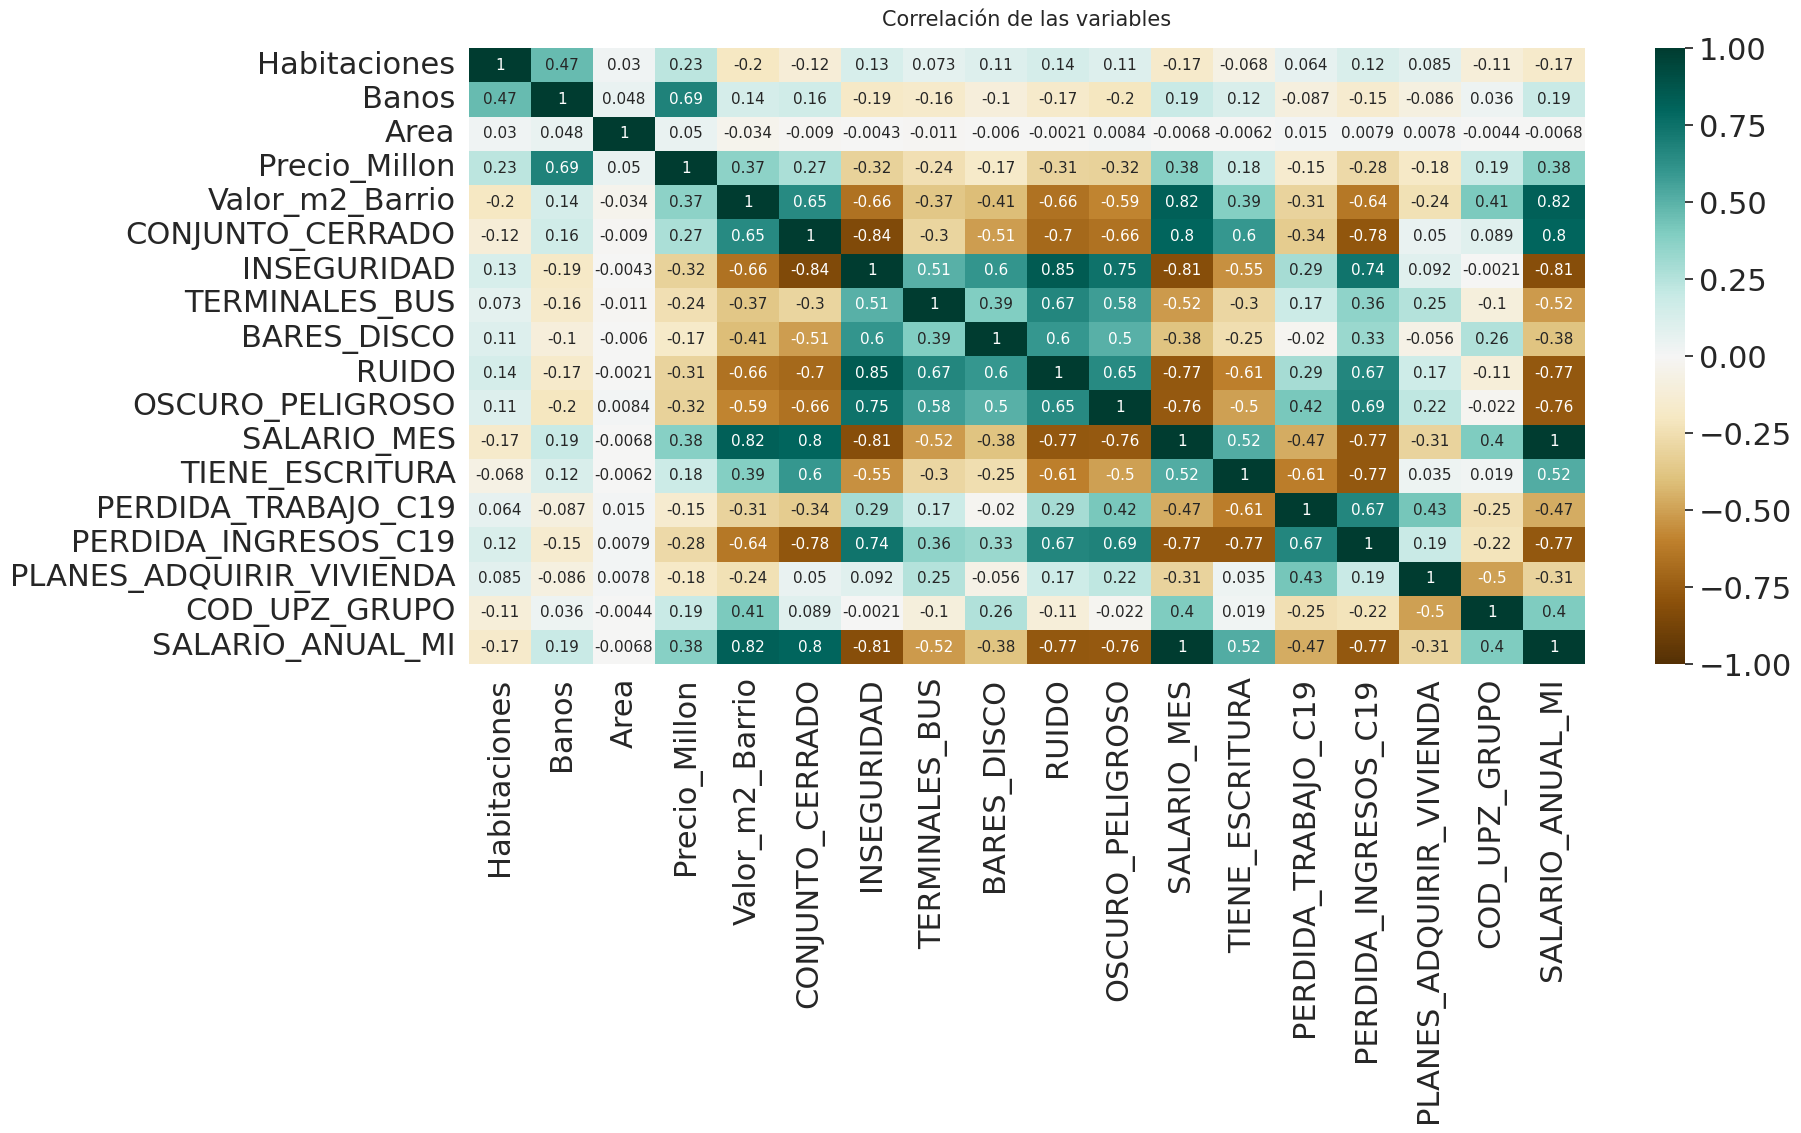

In [ ]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(datos_ml.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',annot_kws = {"size": 11})
heatmap.set_title('Correlación de las variables', fontdict={'fontsize':15}, pad=16);

Observamos que las variables: COD_UPZ_GRUPO, Habitaciones, Banos,CONJUNTO_CERRADO, SALARIO_ANUAL_MI, TIENE_ESCRITURA presentan correlatividad considerable respecto de 'Precio_Millon', que es el valor que queremos predecir. 

# Modelo de aprendizaje automatico

# Regresion Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
#Datos de entrada
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA']] 

y = datos_ml["Precio_Millon"]

#El modelo entrena con un 25% de los datos y una aleatoriedad de 99.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)

#Modelado
modelo_1 = LinearRegression()
modelo_1.fit(X_train, y_train)

y_predict_test = modelo_1.predict(X_test)
y_predict_train = modelo_1.predict(X_train)
#Validacion del modelo
#Aplicamos metricas
 #mae: error absoluto medio
 #r2: Coeficiente de determinacion. Varia entre 0 y 1. Cuanto mas se aproxime a 1, mas eficiente es el modelo. 
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)

print(mae_test,r2_test)
print(mae_train,r2_train)

150.41828023744313 0.5697869530382569
156.60024357823585 0.5353093270149597


In [ ]:
modelo_1.predict([[816,3,3,1,100,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([942.82860303])

Iteramos nuevamente adicionando otra variable

In [ ]:
X = datos_ml[['COD_UPZ_GRUPO','Habitaciones','Banos','CONJUNTO_CERRADO','SALARIO_ANUAL_MI','TIENE_ESCRITURA','Valor_m2_Barrio']] 

y = datos_ml["Precio_Millon"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 99)
modelo_2 = LinearRegression()
modelo_2.fit(X_train, y_train)
y_predict_test = modelo_2.predict(X_test)
y_predict_train = modelo_2.predict(X_train)
mae_test = mean_absolute_error(y_test, y_predict_test)
r2_test = r2_score(y_test, y_predict_test)
mae_train = mean_absolute_error(y_train, y_predict_train)
r2_train = r2_score(y_train, y_predict_train)
print(mae_test,r2_test)
print(mae_train,r2_train)

147.37354503665495 0.5838257244697468
154.28861855642975 0.5452676995011455


Hay una leve mejora en los indicadores de eficiencia.